### ***Naive Bayes***

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
excel = "Dataset.xlsx"

# *Test Naive Bayes model here!!*

In [3]:
def importdata(excel):
    #import attribute
    x = pd.read_excel(excel, index_col=None, header=1)
    x = x.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = pd.read_excel(excel, index_col=None, header=1)
    y = y.iloc[:, 9]
    y = np.array(y)
    return x, y

def label(y):
    clas = []
    for i in range(0, len(y)):
        num = y[i]
        clas.append(num)
    label = set(clas)  #sort all classes data
    label_new = list(label)
    return label_new

#import testset
def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    testset = testset.iloc[:, 0:9]
    test = np.array(testset)
    return test

#calculate prior probability
def prior_prob(y, la, label_new):
    count = 0 
    index = []
    for i in range(0, len(y)):
        predict = y[i]
        if predict == label_new[la]:
            count = count + 1
            index.append(i)  #record the index 
    prob = count / len(y)
    return prob, count, index

#def each class for every tuples
def likelihood(x, point, index, count): #cls_num stands for each class
    prob = 1 #initialize
    for i in range(0, len(point)):
        co = 0 #initialize
        for d in range(0, len(index)):
            num = index[d]
            if x[num][i] == point[i]: #if training data have the same value with test data
                co = co + 1
        p = co/count #P(x=point(value)|C1)
        prob = prob * p
    return prob

def NaiveBayes_point(x, y, label, point):
    maxcp = 0 #initialize
    result = 0
    for l in range(0, len(label)):
        prob, count, index = prior_prob(y, l, label)
        cond = likelihood(x, point, index, count)
        cp = prob*cond
        if cp > maxcp: #find maximized
            maxcp = cp
            result = label[l] 
    return result

def NaiveBayes_test(excel, i):
    finalresult = []
    x, y = importdata(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=2)
    lab = label(y_train)
    for i in range(0, len(x_test)):
        point = x_test[i]
        result = NaiveBayes_point(x_train, y_train, lab, point)
        finalresult.append(result)
    return finalresult, y_test

def NaiveBayes(excel, i):
    finalresult = []
    x, y = importdata(excel)
    test = importtest(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=2)
    lab = label(y_train)
    for i in range(0, len(test)):
        point = test[i]
        result = NaiveBayes_point(x_train, y_train, lab, point)
        finalresult.append(result)
    return finalresult

#### Train model here!

In [4]:
y_pred, y_test = NaiveBayes_test(excel, 0.2)
metrics.accuracy_score(y_test, y_pred)

0.8685258964143426

#### Use model here!

In [6]:
pred = NaiveBayes(excel, 0.2)
len(pred)

100

# *Interpretation (Do NOT RUN) !!*

### **import training data**

In [2]:
def importdata(excel):
    #import attribute
    x = pd.read_excel(excel, index_col=None, header=1)
    x = x.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = pd.read_excel(excel, index_col=None, header=1)
    y = y.iloc[:, 9]
    y = np.array(y)
    return x, y

def label(y):
    clas = []
    for i in range(0, len(y)):
        num = y[i]
        clas.append(num)
    label = set(clas)  #sort all classes data
    label_new = list(label)
    return label_new

### **import testing data**

In [3]:
#import testset
def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    testset = testset.iloc[:, 0:9]
    test = np.array(testset)
    return test

### **calculate prior probability**

In [2]:
#calculate prior probability
def prior_prob(y, la, label_new):
    count = 0 
    index = []
    for i in range(0, len(y)):
        predict = y[i]
        if predict == label_new[la]:
            count = count + 1
            index.append(i)  #record the index 
    prob = count / len(y)
    return prob, count, index

### **calculate P(x|C(i))**

In [5]:
#def each class for every tuples
def likelihood(x, point, index, count): #cls_num stands for each class
    prob = 1 #initialize
    for i in range(0, len(point)):
        co = 0 #initialize
        for d in range(0, len(index)):
            num = index[d]
            if x[num][i] == point[i]: #if training data have the same value with test data
                co = co + 1
        p = co/count #P(x=point(value)|C1)
        prob = prob * p
    return prob

### **Find Maximized(for each test set tuple)**

In [6]:
def NaiveBayes_point(x, y, label, point):
    maxcp = 0 #initialize
    result = 0
    for l in range(0, len(label)):
        prob, count, index = prior_prob(y, l, label)
        cond = likelihood(x, point, index, count)
        cp = prob*cond
        if cp > maxcp: #find maximized
            maxcp = cp
            result = label[l] 
    return result

### **Find Maximized(for the whole)**

In [7]:
def NaiveBayes(x_test, x_train, y_train):
    finalresult = []
    lab = label(y_train)
    for i in range(0, len(x_test)):
        point = x_test[i]
        result = NaiveBayes_point(x_train, y_train, lab, point)
        finalresult.append(result)
    return finalresult

### ***Experiment Result***

**Find the best splitting point**

In [9]:
def NaiveBayes_test(i, excel):
    finalresult = []
    x, y = importdata(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=2)
    lab = label(y_train)
    for i in range(0, len(x_test)):
        point = x_test[i]
        result = NaiveBayes_point(x_train, y_train, lab, point)
        finalresult.append(result)
    return finalresult, y_test

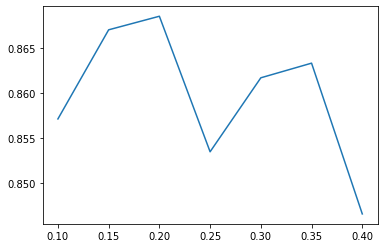

In [143]:
x_p = []
y_pred = []
for i in np.arange(0.1, 0.4, 0.05):
    pred, y_test = NaiveBayes_test(i, excel)
    p = metrics.accuracy_score(y_test, pred)
    y_pred.append(p)
    x_p.append(i)
plt.plot(x_p, y_pred)
#when splitting poiny is around 8:2, best performance

### ***Accuracy***

In [10]:
y_pred, y_test = NaiveBayes_test(0.2, excel)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='micro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.8685258964143426
[[127   0   6]
 [  8   1  11]
 [  6   2  90]]
Precision:  0.8685258964143426
Recall:  0.8685258964143426
F1-Score:  0.8685258964143426


In [11]:
y_pred, y_test = NaiveBayes_test(0.2, excel)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.8685258964143426
[[127   0   6]
 [  8   1  11]
 [  6   2  90]]
Precision:  0.6917213495061975
Recall:  0.6410848549946294
F1-Score:  0.6306708671656694
